In [1]:
import matplotlib.pyplot as plt
import numpy as np
import rrcf
from rrcf.shingle import shingle

In [2]:
data = np.load("taxi_all.npz")

In [3]:
# make the initial trees
# rememeber the index of the order of data points added into the tree
# insert and compute the codisp 
# done !

In [4]:
num_trees = 20
forest = []
sample_size = 1000
data_dim = 48
data_index = []

In [5]:
# make the inital trees 
data_stream = shingle(data["passengers"], data_dim)
inital_data = next(data_stream)
inital_data = np.vstack((inital_data, next(data_stream)))
inital_data = np.vstack((inital_data, next(data_stream)))
# add 3 data points 
data_index = [0, 1, 2]

In [6]:
inital_data.shape

(3, 48)

In [7]:
forest = [rrcf.RCTree(inital_data) for i in range(0, num_trees)]

In [8]:
codisp = np.zeros((len(data["passengers"]), num_trees))
for i in range(3*data_dim, len(data["passengers"])):
    if len(data_index) >= sample_size:
        # forget the point 
        for tree in forest:
            tree.forget_point(data_index[0])
        data_index.pop(0)
        
    data_index.append(i+3)
    # insert the new point
    d = next(data_stream)
    for tree in forest:
        tree.insert_point(np.asarray(d), data_index[-1])
        # compute the codisp 
        codisp[i, forest.index(tree)] = tree.codisp(data_index[-1])

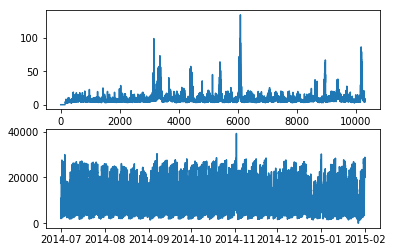

In [11]:
plt.subplot(2,1,1)
plt.plot(codisp.mean(axis=1))
plt.subplot(2,1,2)
plt.plot(data["dates"], data["passengers"])